Natalia Brzozowska
# Laboratorium 9
## Faktoryzacja QR

***
## Zadanie 1
### Faktoryzacja QR metoda Grama-Schmidta
  #### 1. Napisz funkcje dokonujaca faktoryzacji QR macierzy A 2 $R^{n×n}$, A = [$a_{1}, a_{2}, . . . , a_{n}$] ($a_{i}$ to kolejne kolumny macierzy A) klasyczną metodą ortogonalizacji Grama- Schmidta.
   ***

Faktoryzacja QR macierzy A polega na przedstawieniu macierzy A w postaci dwóch macierzy Q i R, gdzie macierz Q jest macierzą ortogonalną (czyli taką, dla której zachodzi $A^{T}A = I$), a R jest macierzą górną trójkątną. Dzięki temu $A=QR$.<br><br>
Proces faktoryzacji macierzy Grama-Schmidta wykorzystuje kolumny macierzy A. Aby uzyskać rozkład QR należy rozpocząć faktoryzację od pierwszej kolumny. Pierwszy element tabeli wynikowej Q, jest znormalizowanym wektorem będącym pierwszą kolumną macierzy A. Kolejne elementy macierzy Q zależą od poprzednich wektorów dodanych do tej macierzy. Każdy kolejny wektor jest obliczany jako znormalizowany wektor obliczony jako różnica kolejnej kolumny macierzy A i sumy iloczynów wcześniejszych elementów macierzy Q z iloczynem skalarnym tego poprzedniego elementu i konkretnej kolumny macierzy A.<br><br>
Macierz R jest macierzą trójkątną górną, w której powyżej przekątnej znajdują się iloczyny skalarne odpowiednich kolumn macierzy Q.<br><br>
W poniższej implementacji wektory do macierzy Q (w kodzie jest to macierz "u") dodawane są jako wiersze, dlatego funkcja zwraca transponowaną macierz Q.

In [2]:
import numpy as np

In [3]:
def column(A,num):
    return [row[num] for row in A ]

def Gram_Schmidt_method(A):
    n=len(A[0])
    u=[]
    k=0
    col = column(A,k)
    u.append(col / np.linalg.norm(col))
    
    for k in range(1,n):
        ak = column(A,k) 
        suma = 0
        
        for i in range(k):
            suma += np.dot(u[i],ak)*u[i]

        c = ak - suma
        u.append(c/np.linalg.norm(c))
    
    R = np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            if i<=j :
                R[i][j] = np.dot(u[i],column(A,j))
                
    return np.array(u).T,R

***
#### 2. Przetestuj zaimplementowaną metodę porównując wyniki uzyskane za jej pomocą z wynikami zwracanymi przez funkcję biblioteczna. W testach wykorzystaj 4-5 macierzy losowych o różnym rozmiarze.

***
Poniżej zaimplementowałam trzy funkcje służące przetestowaniu poprawności działania zaimplementowanej wcześniej faktoryzacji QR.<br><br>
Funkcja _make_matrix(n)_ przyjmuje jak argument rozmiar macierzy, którą musi utworzyć. Następnie przy pomocy funkcji bibliotecznej wytwarza tą macierz i mnoży każdy element przez 10. Przez to w macierzy znajdują się elementy z zakresu [0,10). <br><br>
Funkcja _compare_results(A)_ porównuje macierze uzyskane z funkcji bibliotecznej numpy.linalg.qr z wynikami zaimplementowanej przeze mnie funkcji. Sprawdza ona wartości bezwzględne elementów macierzy, ponieważ mogą one się różnić między sobą (jednak nie wpływa to na poprawność działania metody). Sprawdza również czy zachodzi równość $A=QR$.
<br><br>
Funkcja _test_QR()_ agreguje tworzenie i testowanie pięciu macierzy, wykorzystując wcześniej opisane funkcje.

In [4]:
def make_matrix(n):
    return np.random.rand(n,n)*10
    
    
def compare_results(A):
    q,r = np.linalg.qr(A)
    Q,R = Gram_Schmidt_method(A)

    print("Macierze Q są zgodne -", np.allclose(abs(Q),abs(q)))
    print("Macierze R są zgodne -", np.allclose(abs(R),abs(r)))
    print("Macierz wejściowa A jest równa QR -" , np.allclose(A,np.dot(Q,R)))

    
def test_QR():
    print("Macierz 15x15")
    A = make_matrix(15)
    compare_results(A)
    
    print("\nMacierz 25x25")
    A = make_matrix(25)
    compare_results(A)
    
    print("\nMacierz 40x40")
    A = make_matrix(40)
    compare_results(A)
    
    print("\nMacierz 60x60")
    A = make_matrix(60)
    compare_results(A)
    
    print("\nMacierz 77x77")
    A = make_matrix(77)
    compare_results(A)

In [5]:
test_QR()

Macierz 15x15
Macierze Q są zgodne - True
Macierze R są zgodne - True
Macierz wejściowa A jest równa QR - True

Macierz 25x25
Macierze Q są zgodne - True
Macierze R są zgodne - True
Macierz wejściowa A jest równa QR - True

Macierz 40x40
Macierze Q są zgodne - True
Macierze R są zgodne - True
Macierz wejściowa A jest równa QR - True

Macierz 60x60
Macierze Q są zgodne - True
Macierze R są zgodne - True
Macierz wejściowa A jest równa QR - True

Macierz 77x77
Macierze Q są zgodne - True
Macierze R są zgodne - True
Macierz wejściowa A jest równa QR - True


Jak widać wszytskie wyniki są zgodne, zatem zaimplementowana funkcja działa porawnie.

***
#### 3. Wygeneruj 30-50 przykładowych macierzy 8 × 8 o różnym wskaźniku uwarunkowania cond($A_{i}$) (stosunek największej do najmniejszej wartości osobliwej). Wykorzystaj w tym celu SVD oraz biblioteczną funkcje realizujaca dekompozycje QR (potrzebne będą dwie losowe macierze ortogonalne oraz diagonalna macierz odpowiednio szybko malejacych wartosci osobliwych).

***
Poniżej zaimplementowałam funkcje, z których będę korzystać przy generowaniu macierzy 8x8.<br><br>

Funkcja _make_cond_matrix(vector)_ przyjmuje jako argument wektor, z posortowanymi wartościami, które posłużą do utworzenia macierzy diagonalnej. Stosunek największej do najmniejszej wartości z tej tablicy jest wskaźnikiem uwarunkowania. Następnie tworzone są dwie tablice z losowymi elementami, o wymiarach 8x8, na których później przeprowadzana jest faktoryzacja qr (korzystając z funkcji bibliotecznej). Macierze Q, będące wynikiem tej transformacji, są macierzami ortogonalnymi i właśnie one w połączeniu z macierzą diaonalną utworzą macierz.
<br><br>
Funkcja _sort_key(row)_ przyjmuje jako argument wiersz - wektor i zwraca stosunek największej do najmniejszej wartości w tej tablicy. Ta funkcja służy do sortowania wektorów według ich wskaźnika uwarunkowania.
<br><br>
W funkcji _make_all_matrices(n)_ tworzone jest n macierzy. Najpierw tworzonych jest n wektorów, przeznaczonych do bycia przekątnymi macierzy diagonalnej. Wartości wewnątrz wektora są sortowane i następnie, jeśli jeszcze nie został utworzony wektor o takim wskaźniku uwarunkowania, wektor jest dodawany do macierzy zawierającej przekątne, a do innej tablicy zapisywany jest wskaźnik uwarunkowania tego wektora. Po utworzeniu n wektorów macierz zawierająca te tablice jest sortowana przy użyciu funkcji _sort_key(row)_ oraz sortowana jest tablica wskaźników uwarunkowania.
Później dla każdej utworzonej przekątnej tworzona jest macierz przy użyciu funkcji _make_cond_matrix(vector)_. Każda tak utworzona macierz jest dodawana to tablicy y.<br>
Funkcja zwraca tablicę macierzy y oraz tablicę wartościu uwarunkowania.

In [6]:
def make_cond_matrix(vals):   
    diag = np.diagflat(vals)
    
    m1 = np.random.rand(8,8)*10
    m2 = np.random.rand(8,8)*10
    
    orto1,r = np.linalg.qr(m1)
    orto2,r = np.linalg.qr(m2)
    
    return (orto1 @ diag) @ orto2
    
    
    
def sort_key(row):
    return row[0]/row[len(row)-1]


def make_all_matrices(n):
    diags = []
    y=[]
    x=[]
    
    for i in range(n):
        arr = np.random.rand(8)*10
        s = sorted(arr, reverse=True)
        
        while s[0]/s[7] in x:
            arr = np.random.rand(8)*10
            s = sorted(arr, reverse=True)

        diags.append(s)
        x.append(diags[i][0]/diags[i][7])
    
    diags.sort(key = sort_key)
    x.sort()
        

    for row in diags:
        matrix = make_cond_matrix(row)
        y.append(matrix)
        
    return y, x

In [7]:
matrices, x = make_all_matrices(40)

***
#### 4. Dla każdej z uzyskanych w ten sposób macierzy $A_{i}$ wyznacz faktoryzacje QR korzystając z zaimplementowanej funkcji ($A_{i} = Q_{i}R_{i}$). Przedstaw zależność $||I−Q^{T}_{i} Q_{i}||$ od cond($A_{i}$).

***
Funkcja _do_qr_compare(matrices)_ wykonuje faktoryzację QR dla każdej macierzy przekazanej w tablicy macierzy _matrices_. Następnie oblicza podane w poleceniu działanie i jego wartość zapisuje do tablicy y, którą później zwraca.<br><br>

Funkcja _show_plt(x,y)_ przedstawia na wykresie wartości obliczone przez funkcję _do_qr_compare(matrices)_ w odniesieniu do wskaźników uwarunkowania zwracanych przez funkcję _make_all_matrices(n)_.

In [8]:
import matplotlib.pylab as plt

In [9]:
def do_qr_compare(matrices):
    y=[]
    
    for matrix in matrices:
        q,r = Gram_Schmidt_method(matrix)
        c = np.identity(8) - (q.T@q)
        y.append(np.linalg.norm(c))

    return y

def show_plt(x,y):
    plt.figure(num=1,figsize=(12,8))
    plt.plot(x,y, 'bo')
    plt.xlabel('cond')
    plt.ylabel('error')
    plt.show()


In [10]:
y = do_qr_compare(matrices)

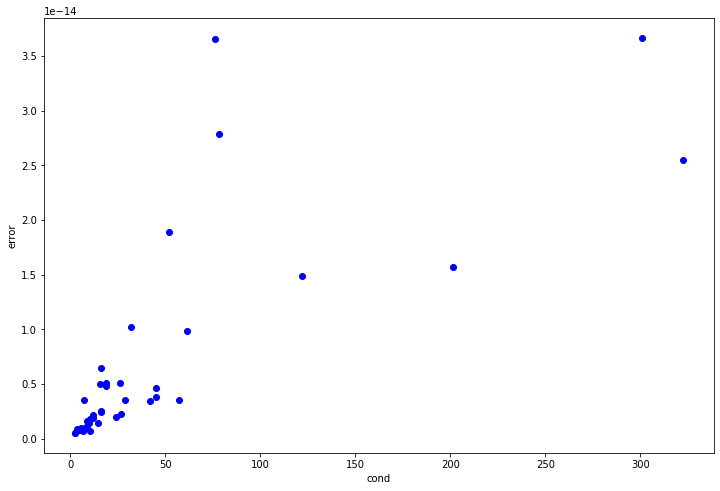

In [11]:
show_plt(x,y)

***
#### 5. Zinterpretuj wyniki. Jaka jest przyczyna uzyskanych rozbieżnosci? Od czego zależy wielkość rozbieżności?

Na wykresie można zauważyć, że wraz ze wzrostem wskaźnika uwarunkowania cond, wzrasta obliczony błąd. Jeśli wskaźnik uwarunkowania jest wysoki, to taka macierz jest źle uwarunkowana. Macierz źle uwarunkowana, oznacza macierz, w której względnie niewielkie zmiany danych, mogą spowodować względnie duże rozbieżności w rozwiązaniu.  Obliczony błąd powinien być równy zeru (w idealnej sytuacji), ponieważ macierz ortogonalna Q ma własność $QQ^{T}=I$. <br><br>
Ponieważ w implementacji faktoryzacji QR, każda kolejna kolumna macierzy Q zależy od poprzedniej, mogą wystąpić błędy numeryczne w zaokrąglaniu liczb. Dlatego im większy jest współczynnik cond, tym większa jest różnica między największym  i najmniejszym elementem na przekątnej macierzy diagonalnej, a zatem w macierzy utworzonej w wyniku mnożenia macierzy diagonalnej o większym cond z macierzami ortogonalnymi mogą wystąpić większe wartości elementów tej macierzy. Przez to później w czasie obliczania macierzy Q, może wystąpić więcej potrzeb zaokrąglania liczb. Wtedy utworzona macierz Q nie będzie całkowicie ortogonalna.
<br>Oczywiście nie jest to reguła w każdym przypadku, bo wartość elementów macierzy zależy również od wartości macierzy ortogonalnych przez które mnożona jest macierz diagonalna. 

***
## Zadanie 2 
### Rozwiazywanie układów równań metodą QR

#### Bezpośrednie rozwiązywanie układu równań przy pomocy równań normalnych jest obarczone dużym błędem jeśli macierz A jest źle uwarunkowana (jej współczynnik uwarunkowania jest wysoki). Lepszym sposobem jest wykorzystanie dekompozycji QR w tym celu.<br><br> Napisz funkcję rozwiazujacą nadokreślony układ równań liniowych metoda QR korzystając z własności macierzy ortogonalnych: $A^{T} = A^{−1}$, a także z mechanizmu back substitution. Nastepnie wykorzystaj ją do rozwiazania problemu aproksymacji średniokwadratowej dla zbioru punktów podanego w tabeli ponizej. Przyjmij model postaci:<br>$ f(x) = a_{0} + a_{1x} + a_{2}x^{2}$. Przedstaw wizualizacje uzyskanego wyniku (punkty oraz funkcja aproksymujaca f).

***
Napisałam dwie funkcje. Funkcja _solve_equations(A,B)_ służy rozwiązaniu układu równań w postaci macierzowej. W tej funkcji najpierw wykonuję dekompozycję QR macierzy A, a następnie korzystając z zależności <br> $Ax=B$<br>$QRx=B$<br>$Rx=Q_{T}B$<br> i mechanizmu back substitution obliczam wektor wynikowy. Następnie sprawdzam pooprawnośc wykonanych obliczeń.
<br><br>
Funkcja _back_substitution(A,B)_ jest implementacją mechanizmu back substitution służącego znalezieniu rozwiązania układu równań, gdy macierz A jest macierzą trójkątną górną. Idąc "od końca" macierzy A (czyli on wiersza, gdzie tylko jeden element jest różny od zera) oblicza się kolejno wartości kolejnych niewiadomych, posługując się wcześniej wyliczonymi wartościami. Tak np. dla wyliczenia drugiej "od końca" niewiadomej, odpowiadającej wierszowi z dwiema wartościami różnymi od zera należy wykorzytać wartość obliczonej niewiadomej dla wiersza z jedną niewiadomą.

In [12]:
def solve_equations(A,B):
    q,r = Gram_Schmidt_method(A)
    sol = back_substitution(r, q.T@B)
    print("Wyniki funkcji jest podobny do wyniku f. bibliotecznej -", np.allclose(np.linalg.solve(r,q.T@B),sol))
    return sol

def back_substitution(A,B):
    n = len(B)
    x = [0]*n
    suma = 0
    
    for i in range(n-1,-1,-1):
        suma = 0
        
        for j in range(n-1, i, -1):
            suma += A[i][j]*x[j]
            
        x[i]=(B[i] - suma) / A[i][i]
    
    return x

In [13]:
A = np.array([
[4, 17 ,9],
[7, 35, 0],
[9, 1, 2]])
B = np.array([11, 6, 4])

solve_equations(A,B)

Wyniki funkcji jest podobny do wyniku f. bibliotecznej - True


[0.23443223443223443, 0.12454212454212456, 0.8827838827838829]

Poniższe funkcje służą przedstawieniu wykorzystania zaimplementowanych funkcji do rozwiązania problemu aproksymacji średniokwadratowej dla podanej funkcji _f(a,x)_ i punktów x,y.<br><br>
Funkcja _x_matrix(x)_ tworzy macierz potrzebną do przedstawiania układu równań macierzowo.<br><br>
Funkcja _f(a,x)_ przedstawia funkcję kwadratową w zalezności od współczynników a i wartości x.
<br><br>
Funkcja _do_approx(x,y)_ wykonuje aproksymację średniokwadratową zbioru punktów (x,y) dla modelu _f(a,x)_. Wywołaywana jest funkcja _solve_equations(x_matrix,y)_ wykorzystująca dekompozycję QR to rozwiązana układu równań. Wynikiem jej działania są współczynniki, pojawiające się w funkcji _f(a,x)_. Następnie definiowany jest zbiór punktów xs, dla którego wywoływana jest funkcja aproksymująca _f(a,x)_. Nastęnie rysowany jest wykres zawierający funkcję aproksymującą i podane w zadaniu punkty.

In [14]:
def x_matrix(x):
    m = []
    for el in x:
        m.append([1,el,el**2])
        
    return np.array(m)


def f(a,x):
    return a[0]+a[1]*x+a[2]*x**2


def do_approx(x,y):
    x_m = x_matrix(x)
    a = solve_equations(x_m,y)
    
    xs = np.arange(-6,6,0.05)
    points = [f(a,xi) for xi in xs]
    
    plt.figure(num=1,figsize=(15,10))
    plt.plot(x,y, 'mD')
    plt.plot(xs,points, 'c')
    plt.xlabel('x')
    plt.ylabel('y')

Wyniki funkcji jest podobny do wyniku f. bibliotecznej - True


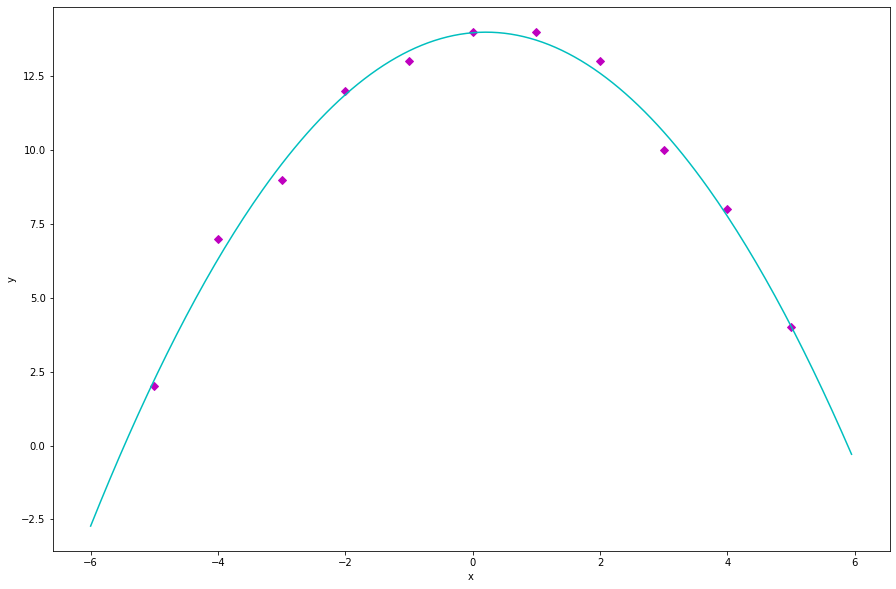

In [15]:
x = np.arange(-5,6,1)
y = [2,7,9,12,13,14,14,13,10,8,4]

do_approx(x,y)

***
### Wnioski
Funkcja aproksymująca dobrze przybliżyła kształt tworzony przez podany zbiór punktów. Dekompozycja QR daje dobre wyniki w przypadku aproksymacji średniokwadratowej, jak i rozwiązywania układów równań, nawet gdy macierz wejściowa A jest źle uwarunkowana. Jednak wraz ze wzrostem współczynnika uwarunkowania, wzrasta błąd reprezentacji liczb, przez co wyniki dekompozycji QR nie są bezbłędne.<br><br>
